In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('iris.data', header=None)

In [2]:
X = data.iloc[:, :4].to_numpy()
labels = data.iloc[:, 4].to_numpy()

In [17]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Y = le.fit_transform(labels)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

In [19]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print((y_test != y_pred).sum()) #количество наблюдений, который были неправильно определены

4


Атрибуты классификатора GaussianNB (наивный байесовский алгоритм) включают:

1. "class_count_": количество обучающих выборок, наблюдаемых в каждом классе.
2. "class_prior_": вероятности каждого класса.
3. "classes_": метки классов, известные классификатору.
4. "epsilon_": абсолютная аддитивность к вариациям.
5. "n_features_in_": количество признаков, замеченных во время подгонки.
6. "feature_names_in_": имена признаков, видимых во время подгонки. Определяется только в том случае, если все имена особенностей в X являются строками.
7. "var_": дисперсия каждого признака для каждого класса.
8. "theta_": среднее значение каждого признака для каждого класса.

In [20]:
print(f'Точность классификации {gnb.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Точность классификации 94.66666666666667%


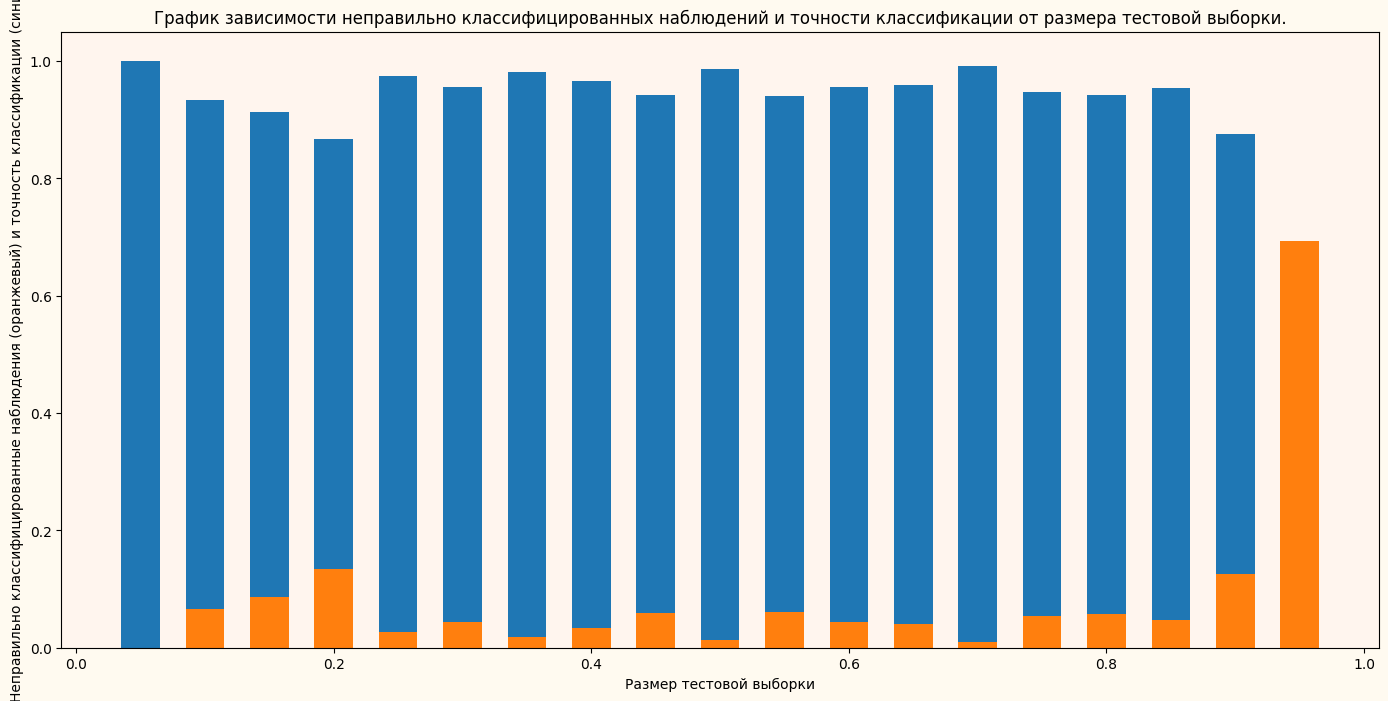

In [21]:
import matplotlib.pyplot as plt

size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки.',
    fontweight=12)

plt.show()

Мультиномиальный классификатор Naive Bayes подходит для классификации с дискретными признаками (например, количество слов для классификации текста). Мультиномиальное распределение обычно требует целочисленного количества признаков.

In [34]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f'Количество наблюдений, неправильно определённых: {np.count_nonzero(y_test != y_pred)}')
print(f'Точность классификации: {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Количество наблюдений, неправильно определённых: 99
Точность классификации: 30.76923076923077%


Классификатор Complement Naive Bayes был разработан для исправления "серьезных допущений", сделанных стандартным классификатором Multinomial Naive Bayes. Он особенно подходит для несбалансированных наборов данных.

In [35]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f'Количество наблюдений, неправильно определённых: {np.count_nonzero(y_test != y_pred)}')
print(f'Точность классификации: {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Количество наблюдений, неправильно определённых: 50
Точность классификации: 65.03496503496503%


Как и MultinomialNB, этот классификатор подходит для дискретных данных. Разница в том, что если MultinomialNB работает с подсчетами вхождений, то BernoulliNB предназначен для бинарных/булевых признаков.

In [36]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB(force_alpha=True)
y_pred = clf.fit(X_train, y_train).predict(X_test)

print(f'Количество наблюдений, неправильно определённых: {np.count_nonzero(y_test != y_pred)}')
print(f'Точность классификации: {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Количество наблюдений, неправильно определённых: 99
Точность классификации: 30.76923076923077%


In [37]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(np.count_nonzero(y_test != y_pred))

81


In [38]:
print(f'Точность классификации {clf.fit(X_train, y_train).score(X_test, y_test) * 100}%')

Точность классификации 65.03496503496503%


In [39]:
print(f'Количество листьев: {clf.get_n_leaves()}')
print(f'Глубина: {clf.get_depth()}')

Количество листьев: 2
Глубина: 1


Из корня дерева и на последующих потомках можно увидеть значение параметра функции измерения,количество образцов и значения. В случае, если существует несколько классов с одинаковой и самой высокой вероятностью, классификатор предскажет класс с самым низким индексом среди этих классов.

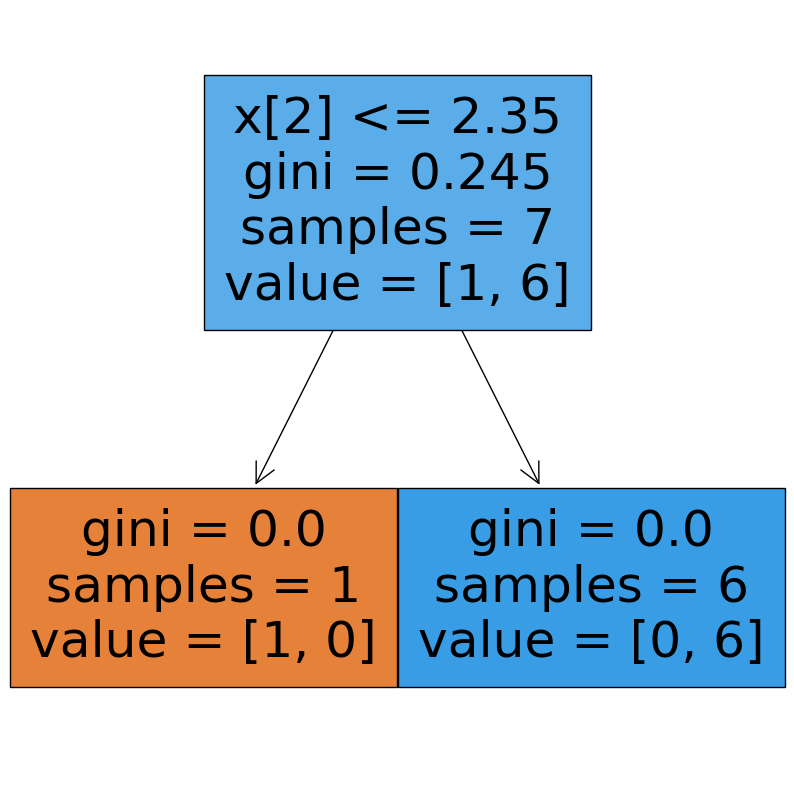

In [40]:
import matplotlib.pyplot as plt

plt.subplots(1, 1, figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()

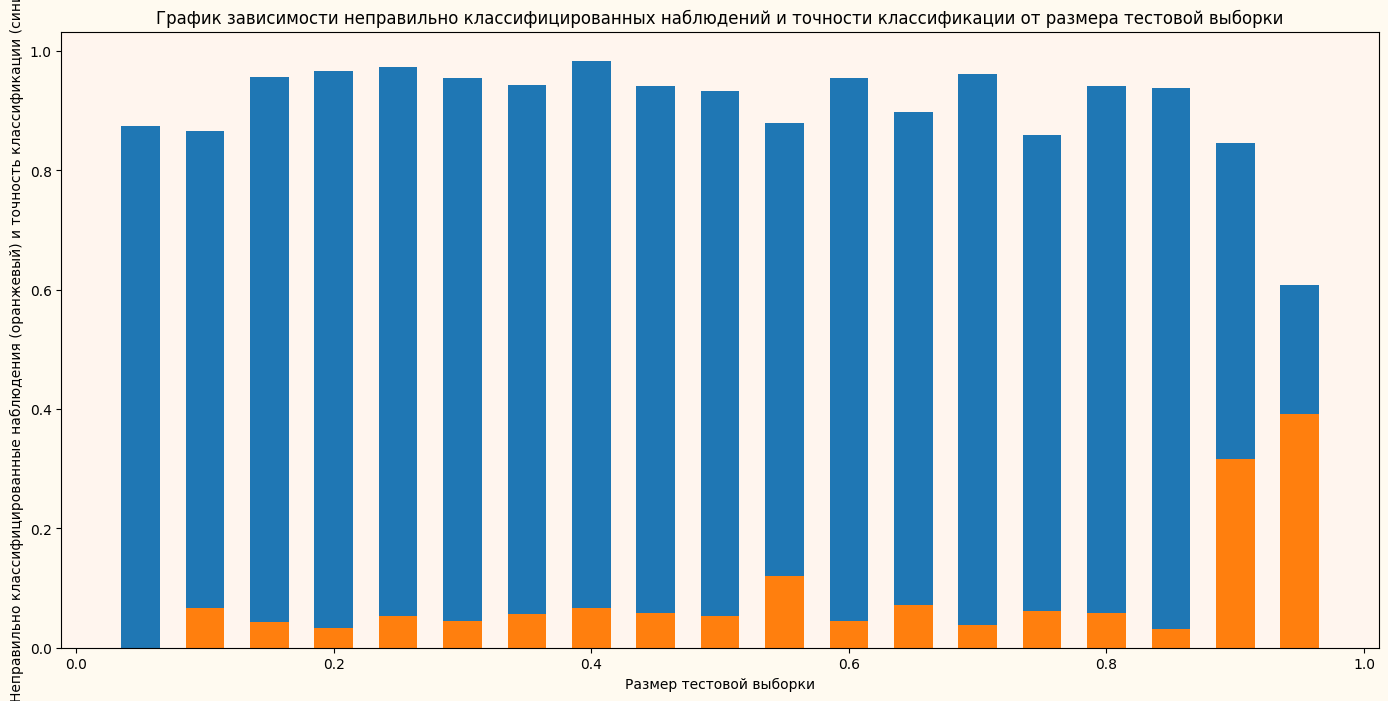

In [41]:
size = 0
list_test_size = []
percentage_misclassified_observations = []
classification_accuracy = []

while size <= 0.95:
    size += 0.05

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=size)
    gnb = tree.DecisionTreeClassifier()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)

    list_test_size.append(size)
    percentage_misclassified_observations.append(np.count_nonzero(y_test != y_pred) / len(y_pred))
    classification_accuracy.append(gnb.fit(X_train, y_train).score(X_test, y_test))

fig, ax = plt.subplots()

ax.bar(list_test_size, classification_accuracy, width=0.03)
ax.bar(list_test_size, percentage_misclassified_observations, width=0.03)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Размер тестовой выборки')
plt.ylabel('Неправильно классифицированные наблюдения (оранжевый) и точность классификации (синий)')
plt.title(
    label='График зависимости неправильно классифицированных наблюдений и точности классификации от размера тестовой выборки',
    fontweight=12)

plt.show()

In [42]:
from random import randint

criterion_parameters = ('gini', 'entropy', 'log_loss')
splitter_parameter = ('best', 'random')
for parameter in criterion_parameters:
    sp_par_random = splitter_parameter[randint(0, 1)]
    max_dp_random = randint(5, 40)
    min_samples_split_random = randint(5, 40)
    min_samples_leaf_random = randint(5, 40)

    gnb = tree.DecisionTreeClassifier(criterion=parameter, splitter=sp_par_random, max_depth=max_dp_random,
                                      min_samples_split=min_samples_split_random,
                                      min_samples_leaf=min_samples_leaf_random)
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    print(
        f'При criterion: {parameter}, splitter: {sp_par_random}, max_depth: {max_dp_random}, min_samples_split: {min_samples_split_random}, min_samples_leaf: {min_samples_leaf_random} \n точность классификации {gnb.fit(X_train, y_train).score(X_test, y_test) * 100}%, количество листьев: {gnb.get_n_leaves()}, глубина: {gnb.get_depth()}\n')

При criterion: gini, splitter: random, max_depth: 26, min_samples_split: 23, min_samples_leaf: 11 
 точность классификации 32.16783216783217%, количество листьев: 1, глубина: 0

При criterion: entropy, splitter: random, max_depth: 8, min_samples_split: 35, min_samples_leaf: 36 
 точность классификации 32.16783216783217%, количество листьев: 1, глубина: 0

При criterion: log_loss, splitter: best, max_depth: 16, min_samples_split: 11, min_samples_leaf: 29 
 точность классификации 32.16783216783217%, количество листьев: 1, глубина: 0

